## Introduction
Churn prediction is probably one of the most important applications of data science in the commercial sector. The thing which makes it popular is that its effects are more tangible to comprehend and it plays a major factor in the overall profits earned by the business.

### What exactly is Churn Prediction?
Churn is defined in business terms as ‘when a client cancels a subscription to a service they have been using.’ A common example is people cancelling Spotify/Netflix subscriptions. So, Churn Prediction is essentially predicting which clients are most likely to cancel a subscription i.e ‘leave a company’ based on their usage of the service.

From a company point of view, it is necessary to gain this information because acquiring new customers is often arduous and costlier than retaining old ones. Hence, the insights gained from Churn Prediction helps them to focus more on the customers that are at a high risk of leaving.

The output in the case of Churn prediction is a simple yes or a no. That makes it a classification problem where you have to predict 1 if the customer is likely to churn and 0 otherwise.

gender
Whether the customer is a male or a female

SeniorCitizen
Whether the customer is a senior citizen or not (1, 0)

Partner
Whether the customer has a partner or not (Yes, No)

Dependents
Whether the customer has dependents or not (Yes, No)

tenure
Number of months the customer has stayed with the company

PhoneService
Whether the customer has a phone service or not (Yes, No)

MultipleLines
Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService
Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity
Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup
Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection
Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport
Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV
Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies
Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract
The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling
Whether the customer has paperless billing or not (Yes, No)

PaymentMethod
The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges
The amount charged to the customer monthly

TotalCharges
The total amount charged to the customer

Churn
Whether the customer churned or not (Yes or No)



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
df.drop('customerID',axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
df.shape

(7043, 20)

In [12]:
df['Churn'].value_counts()     #this is unbalanced dataset 

No     5174
Yes    1869
Name: Churn, dtype: int64

Total charges are in float but its data
type has given object . So we have to change it in float. 

In [13]:
# i am changing object to numeric and used errors='coerce' for change string to 'NaN' values.
df[pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


i will remove these rows which have TotalCharges=' '.

In [14]:
df1=df[df['TotalCharges']!=' ']
df1.shape

(7032, 20)

In [15]:
#now changes into float64
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'])

In [16]:
df1['TotalCharges'].dtypes

dtype('float64')

We will visualise according to the tenure because by this we can see how much customer is loyal .

Text(0, 0.5, 'Number Of Customer')

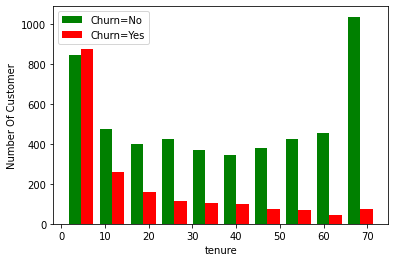

In [17]:
tenure_churn_no=df1[df1['Churn']=='No'].tenure
tenure_churn_yes=df1[df1['Churn']=='Yes'].tenure

plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('Number Of Customer')

Text(0, 0.5, 'Number Of Customer')

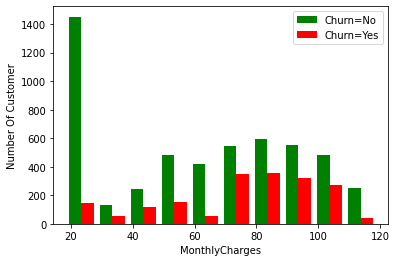

In [18]:
MonthlyCharges_churn_no=df1[df1['Churn']=='No'].MonthlyCharges
MonthlyCharges_churn_yes=df1[df1['Churn']=='Yes'].MonthlyCharges

plt.hist([MonthlyCharges_churn_no,MonthlyCharges_churn_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()
plt.xlabel('MonthlyCharges')
plt.ylabel('Number Of Customer')

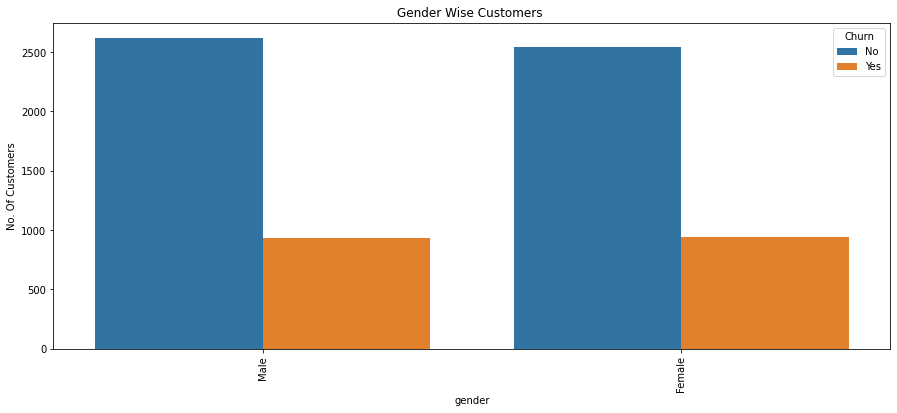

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(data =df1, x='gender', order=df1['gender'].value_counts().index, hue='Churn')
plt.xticks(rotation=90)
plt.xlabel('gender')
plt.ylabel('No. Of Customers')
plt.title('Gender Wise Customers ')
plt.show()

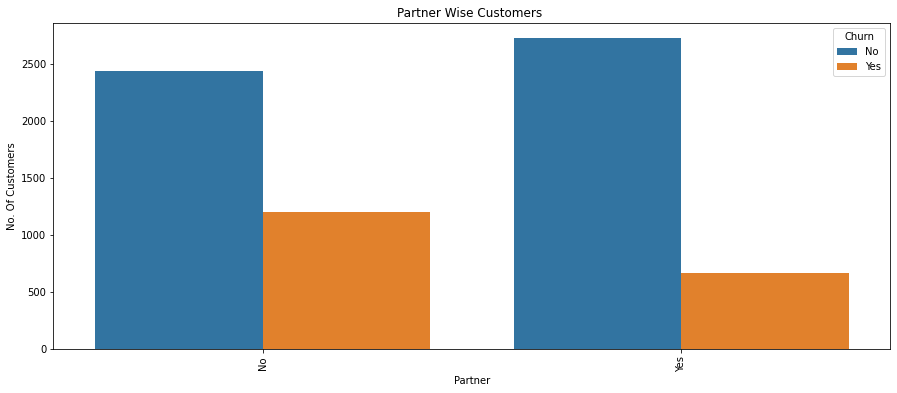

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(data =df1, x='Partner', order=df1['Partner'].value_counts().index, hue='Churn')
plt.xticks(rotation=90)
plt.xlabel('Partner')
plt.ylabel('No. Of Customers')
plt.title('Partner Wise Customers ')
plt.show()

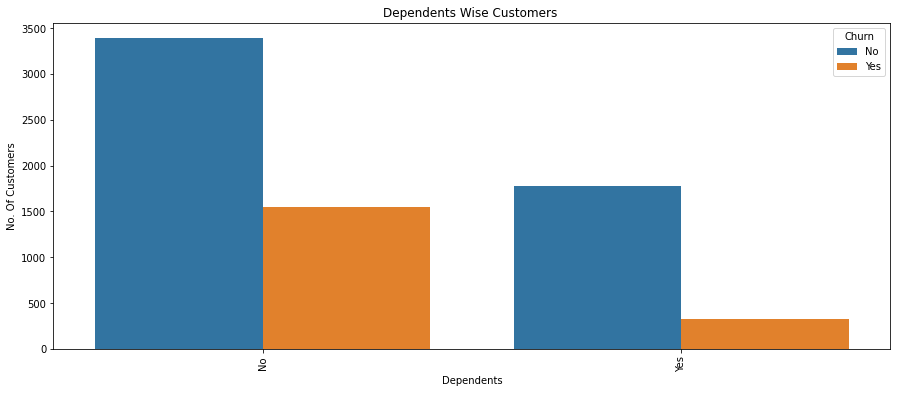

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data =df1, x='Dependents', order=df1['Dependents'].value_counts().index, hue='Churn')
plt.xticks(rotation=90)
plt.xlabel('Dependents')
plt.ylabel('No. Of Customers')
plt.title('Dependents Wise Customers ')
plt.show()

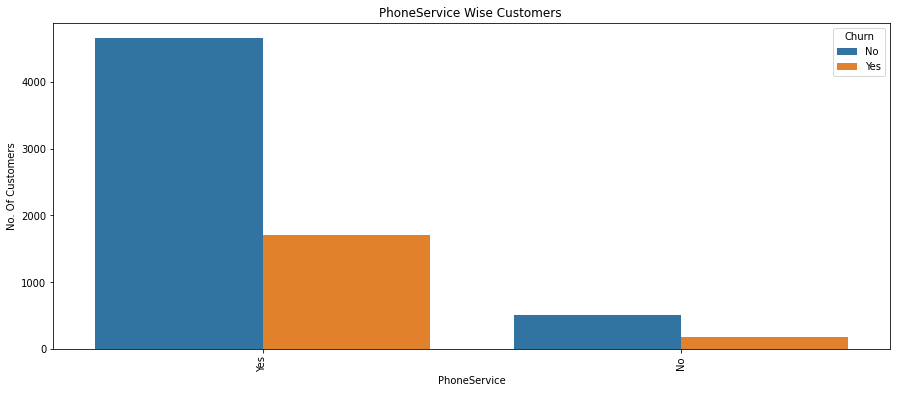

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(data =df1, x='PhoneService', order=df1['PhoneService'].value_counts().index, hue='Churn')
plt.xticks(rotation=90)
plt.xlabel('PhoneService')
plt.ylabel('No. Of Customers')
plt.title('PhoneService Wise Customers ')
plt.show()

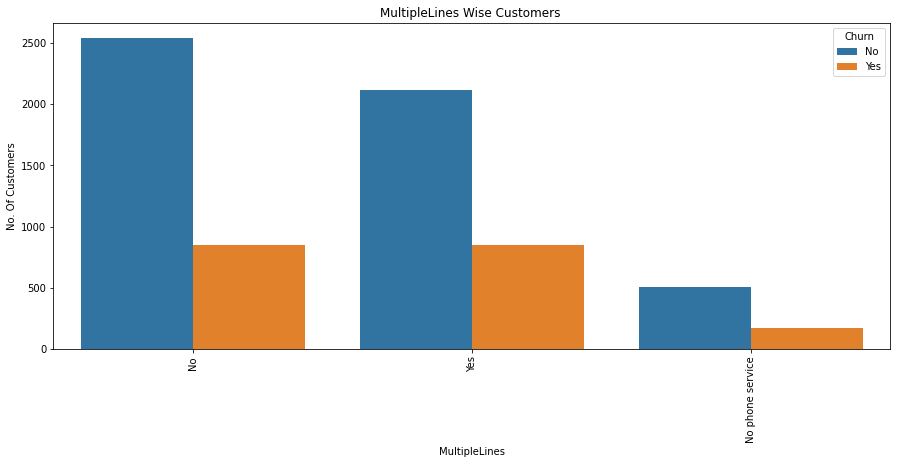

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(data =df1, x='MultipleLines', order=df1['MultipleLines'].value_counts().index, hue='Churn')
plt.xticks(rotation=90)
plt.xlabel('MultipleLines')
plt.ylabel('No. Of Customers')
plt.title('MultipleLines Wise Customers ')
plt.show()

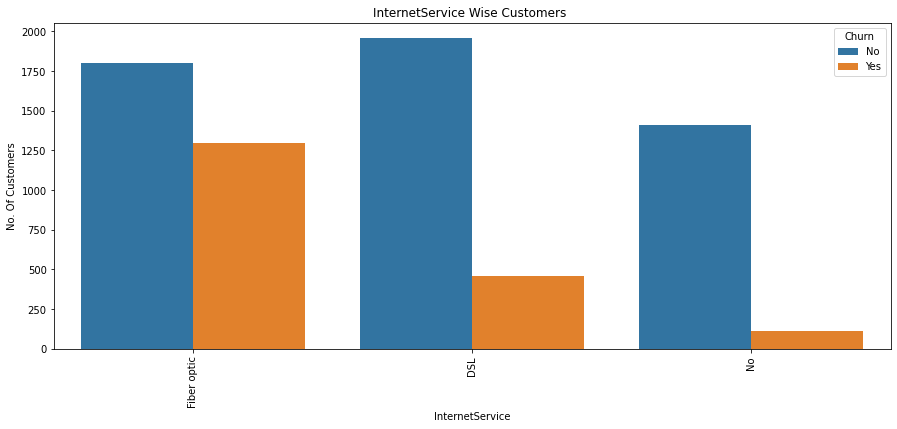

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(data =df1, x='InternetService', order=df1['InternetService'].value_counts().index, hue='Churn')
plt.xticks(rotation=90)
plt.xlabel('InternetService')
plt.ylabel('No. Of Customers')
plt.title('InternetService Wise Customers ')
plt.show()

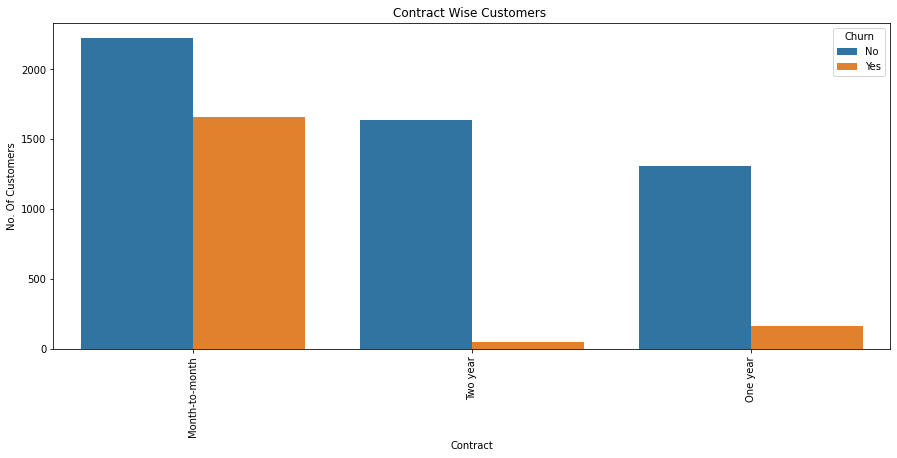

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(data =df1, x='Contract', order=df1['Contract'].value_counts().index, hue='Churn')
plt.xticks(rotation=90)
plt.xlabel('Contract')
plt.ylabel('No. Of Customers')
plt.title('Contract Wise Customers ')
plt.show()

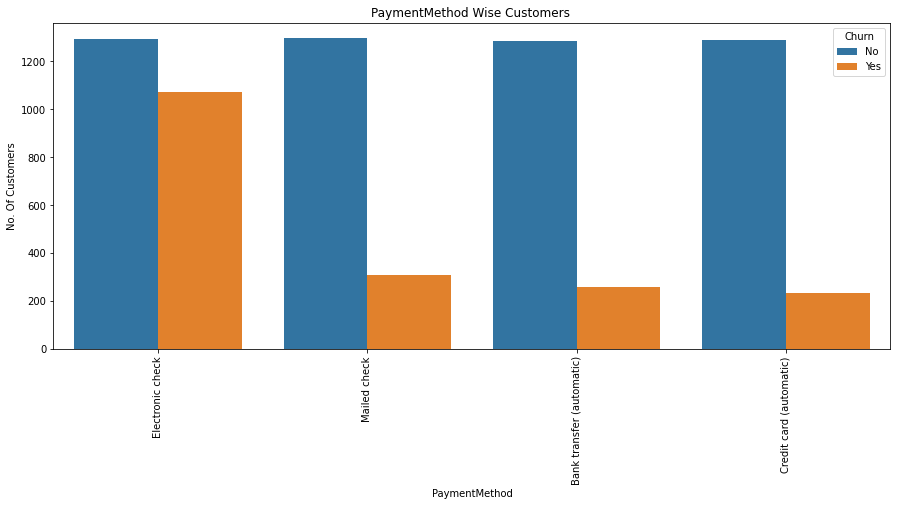

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(data =df1, x='PaymentMethod',order=df1['PaymentMethod'].value_counts().index, hue='Churn')
plt.xticks(rotation=90)
plt.xlabel('PaymentMethod')
plt.ylabel('No. Of Customers')
plt.title('PaymentMethod Wise Customers ')
plt.show()

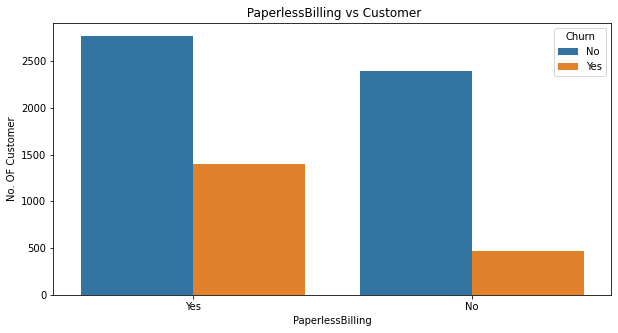

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='PaperlessBilling',hue='Churn', order=df1['PaperlessBilling'].value_counts().index)
plt.xlabel('PaperlessBilling')
plt.ylabel('No. OF Customer')
plt.title(' PaperlessBilling vs Customer')
plt.show()

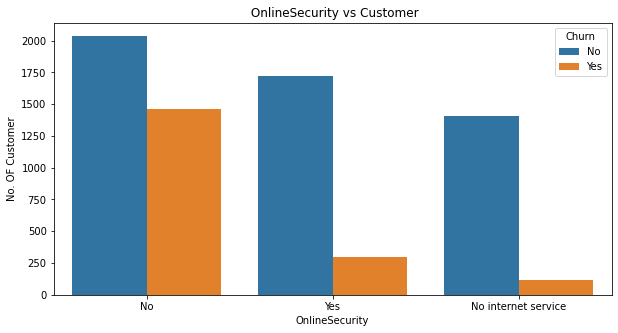

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='OnlineSecurity',hue='Churn', order=df1['OnlineSecurity'].value_counts().index)
plt.xlabel('OnlineSecurity')
plt.ylabel('No. OF Customer')
plt.title(' OnlineSecurity vs Customer')
plt.show()

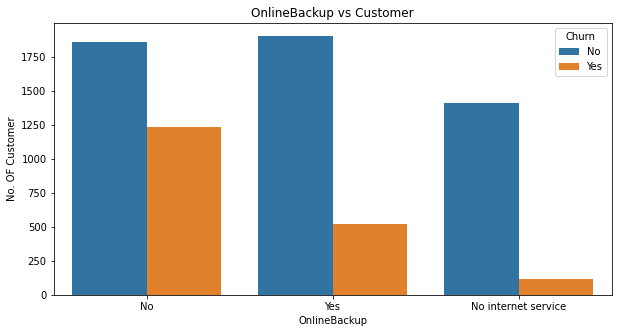

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='OnlineBackup',hue='Churn', order=df1['OnlineBackup'].value_counts().index)
plt.xlabel('OnlineBackup')
plt.ylabel('No. OF Customer')
plt.title('OnlineBackup vs Customer')
plt.show()

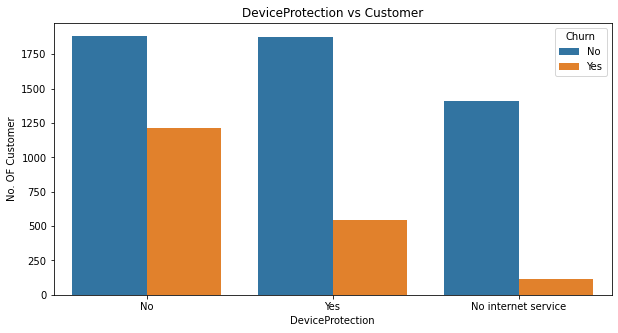

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='DeviceProtection',hue='Churn', order=df1['DeviceProtection'].value_counts().index)
plt.xlabel('DeviceProtection')
plt.ylabel('No. OF Customer')
plt.title('DeviceProtection vs Customer')
plt.show()

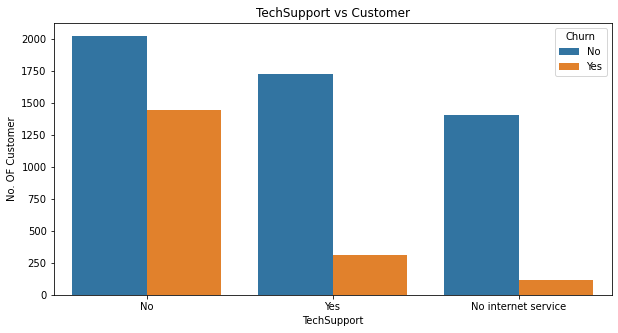

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='TechSupport',hue='Churn', order=df1['TechSupport'].value_counts().index)
plt.xlabel('TechSupport')
plt.ylabel('No. OF Customer')
plt.title('TechSupport vs Customer')
plt.show()

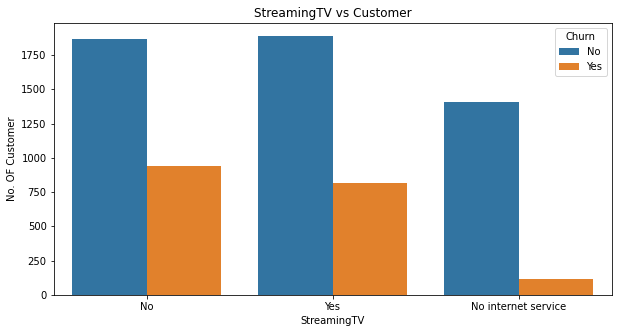

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='StreamingTV',hue='Churn', order=df1['StreamingTV'].value_counts().index)
plt.xlabel('StreamingTV')
plt.ylabel('No. OF Customer')
plt.title('StreamingTV vs Customer')
plt.show()

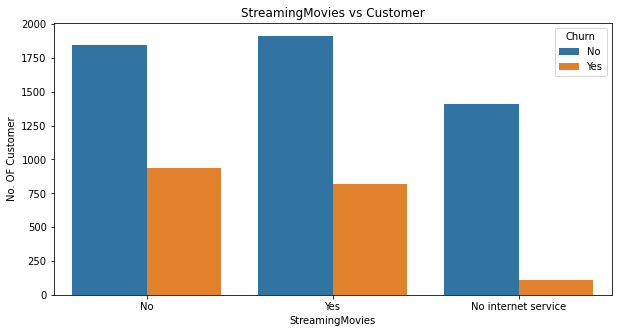

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='StreamingMovies',hue='Churn', order=df1['StreamingMovies'].value_counts().index)
plt.xlabel('StreamingMovies')
plt.ylabel('No. OF Customer')
plt.title('StreamingMovies vs Customer')
plt.show()

Unique values

In [34]:
def unique_col_values(df):
  for i in df.columns:
    if df[i].dtype=='object':
      print(f'unique values of column \'{i}\' are : ',df[i].unique())
  

In [35]:
unique_col_values(df1)

unique values of column 'gender' are :  ['Female' 'Male']
unique values of column 'Partner' are :  ['Yes' 'No']
unique values of column 'Dependents' are :  ['No' 'Yes']
unique values of column 'PhoneService' are :  ['No' 'Yes']
unique values of column 'MultipleLines' are :  ['No phone service' 'No' 'Yes']
unique values of column 'InternetService' are :  ['DSL' 'Fiber optic' 'No']
unique values of column 'OnlineSecurity' are :  ['No' 'Yes' 'No internet service']
unique values of column 'OnlineBackup' are :  ['Yes' 'No' 'No internet service']
unique values of column 'DeviceProtection' are :  ['No' 'Yes' 'No internet service']
unique values of column 'TechSupport' are :  ['No' 'Yes' 'No internet service']
unique values of column 'StreamingTV' are :  ['No' 'Yes' 'No internet service']
unique values of column 'StreamingMovies' are :  ['No' 'Yes' 'No internet service']
unique values of column 'Contract' are :  ['Month-to-month' 'One year' 'Two year']
unique values of column 'PaperlessBilling

In [36]:
yes_no_col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in yes_no_col:
  df1[i]=df[i].replace({'Yes':1,'No':0})
df1


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [37]:
df1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [38]:
#replaced categories with the numeric value
df1['gender']=df1['gender'].replace({'Female':1,'Male':0})
df1['MultipleLines']=df1['MultipleLines'].replace('No phone service',0)
df1=df1.replace('No internet service',0)

In [39]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])


In [40]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [41]:
df2.shape

(7032, 27)

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [43]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5605,0,0,1,1,10,1,0,0,0,1,0,1,0,0,60.20,563.5,0,1,0,0,1,0,0,0,0,0,1
3033,1,0,1,0,68,1,1,1,1,1,0,1,1,1,110.80,7553.6,0,0,1,0,0,0,1,1,0,0,0
3985,0,1,1,0,16,1,0,1,1,0,0,0,0,1,54.55,825.1,0,1,0,0,1,0,0,1,0,0,0
4426,1,0,0,1,16,1,1,0,0,0,1,0,0,1,79.50,1264.2,0,0,1,0,0,1,0,0,1,0,0
1512,1,0,1,1,14,1,1,0,0,0,0,1,0,1,84.80,1203.9,0,0,1,0,1,0,0,0,0,1,0


Normalize the data into one scale

In [44]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])
df2



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,0,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,0,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,1,0,1,0,1,0,0,0,0,0,1


In [45]:
df2.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
930,1,0,0,0,0.211268,1,0,0,1,0,0,0,0,0,0.565672,0.137786,0,0,1,0,1,0,0,1,0,0,0


Separate the Data into x and y then train and test.

In [46]:
x=df2.drop('Churn',axis=1)  #input
y=df2['Churn']              #output

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=272) 
#splitted train and test data into 80:20 



In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 26)
(1407, 26)
(5625,)
(1407,)


## Model Builiding

A- without dealing with Unbalanced Data Problem

### 1- Machine Learning Approach

In [49]:
np.arange(5,55,10)

array([ 5, 15, 25, 35, 45])

Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy=[]
est=np.arange(100,1000,10)
for i in est:
  clf_rf = RandomForestClassifier(n_estimators=i ,random_state=1)      
  clr_rf = clf_rf.fit(x_train,y_train)

  ac = accuracy_score(y_test,clf_rf.predict(x_test))
  accuracy.append(ac*100)
print('Accuracy is: ',accuracy)


Accuracy is:  [76.83013503909027, 76.90120824449183, 77.39872068230277, 77.25657427149964, 77.3276474769012, 77.46979388770433, 77.11442786069652, 76.97228144989339, 77.04335465529495, 77.18550106609808, 77.46979388770433, 77.18550106609808, 76.97228144989339, 77.04335465529495, 76.97228144989339, 77.11442786069652, 77.18550106609808, 77.3276474769012, 77.11442786069652, 77.25657427149964, 77.3276474769012, 77.3276474769012, 77.25657427149964, 77.18550106609808, 77.46979388770433, 77.18550106609808, 77.39872068230277, 77.39872068230277, 77.68301350390902, 77.46979388770433, 77.61194029850746, 77.61194029850746, 77.39872068230277, 77.39872068230277, 77.39872068230277, 77.46979388770433, 77.46979388770433, 77.25657427149964, 77.46979388770433, 77.46979388770433, 77.46979388770433, 77.46979388770433, 77.3276474769012, 77.25657427149964, 77.46979388770433, 77.46979388770433, 77.46979388770433, 77.5408670931059, 77.39872068230277, 77.46979388770433, 77.39872068230277, 77.46979388770433, 77.

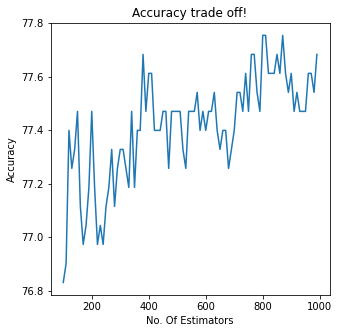

In [51]:
plt.figure(figsize=(5,5))
plt.plot(est,accuracy)
plt.xlabel('No. Of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy trade off!')
plt.show()                    # we can say that no. of estimators are 800 should be optimal

Hyper parameter tunning Of Random Forest Classifier

In [52]:
from  sklearn.model_selection import RandomizedSearchCV
rf_c=RandomForestClassifier()
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)
random_cv.fit(x_train,y_train)
best_random=random_cv.best_estimator_
prediction_cv=best_random.predict(x_test)
print('best estimators are : ',best_random)
print(accuracy_score(y_test,prediction_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   4.1s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   4.1s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   4.1s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   4.6s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

2- Deep Learning Approach

In [53]:
import tensorflow as tf
from tensorflow import keras

In [54]:
model1=keras.Sequential([
                        keras.layers.Dense(20,input_shape=(26,),activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid'),
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.fit(x_train,y_train,epochs=5,batch_size=8)


Epoch 1/5
704/704 [==============================] - 2s 2ms/step - loss: 0.4792 - accuracy: 0.7600
Epoch 2/5
704/704 [==============================] - 1s 2ms/step - loss: 0.4264 - accuracy: 0.7964
Epoch 3/5
704/704 [==============================] - 1s 2ms/step - loss: 0.4192 - accuracy: 0.8016
Epoch 4/5
704/704 [==============================] - 1s 2ms/step - loss: 0.4163 - accuracy: 0.8043
Epoch 5/5
704/704 [==============================] - 1s 1ms/step - loss: 0.4147 - accuracy: 0.8004


Adding One more  hidden Layer

In [55]:
model2=keras.Sequential([
                        keras.layers.Dense(20,input_shape=(26,),activation='relu'),
                        keras.layers.Dense(10,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid'),
])

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.fit(x_train,y_train,epochs=5,batch_size=8)

Epoch 1/5
704/704 [==============================] - 2s 2ms/step - loss: 0.4699 - accuracy: 0.7579
Epoch 2/5
704/704 [==============================] - 1s 2ms/step - loss: 0.4285 - accuracy: 0.7916
Epoch 3/5
704/704 [==============================] - 1s 2ms/step - loss: 0.4214 - accuracy: 0.7959
Epoch 4/5
704/704 [==============================] - 1s 2ms/step - loss: 0.4180 - accuracy: 0.8005
Epoch 5/5
704/704 [==============================] - 1s 2ms/step - loss: 0.4148 - accuracy: 0.8039


adding dropout layers-----means just to avoid overfit and no need to repeat same nuron 

In [56]:
model3=tf.keras.Sequential([
                            keras.layers.Dense(20,input_shape=(26,),activation='relu'),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(100,activation='relu'),
                            keras.layers.Dropout(0.3),
                            keras.layers.Dense(1,activation='sigmoid')
])
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
acc=[]
model3.fit(x_train,y_train,epochs=100,batch_size=10)



Epoch 1/100
563/563 [==============================] - 2s 2ms/step - loss: 0.4644 - accuracy: 0.7664
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4371 - accuracy: 0.7865
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4311 - accuracy: 0.7918
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4248 - accuracy: 0.7964
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4254 - accuracy: 0.8020
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4257 - accuracy: 0.7970
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4196 - accuracy: 0.8004
Epoch 8/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4164 - accuracy: 0.8048
Epoch 9/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4163 - accuracy: 0.8036
Epoch 10/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4143 - accura

In [57]:
acc

[]

as we can see there is not more effect in accuracy when we are increaing hidden layers, we have done hyperparameter tunning , increased epochs as well .

In [58]:
model1.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.7982


[0.4251297414302826, 0.7981520891189575]

In [59]:
model2.evaluate(x_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.7768


[0.4432357847690582, 0.7768301367759705]

based on model2----

In [60]:
y_pred=model2.predict(x_test)
y_pred

array([[0.05898479],
       [0.07405618],
       [0.68878853],
       ...,
       [0.7558861 ],
       [0.11952966],
       [0.29892316]], dtype=float32)

In [61]:
#will convert into one dimension
y_predict=[]
for i in y_pred:
  if i>0.5:
    y_predict.append(1)
  else:
    y_predict.append(0)

In [62]:
y_predict[:5]

[0, 0, 1, 0, 1]

In [63]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm=confusion_matrix(y_test,y_predict)
print(cm)


0.7768301350390903
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1035
           1       0.57      0.63      0.60       372

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.79      0.78      0.78      1407

[[857 178]
 [136 236]]


Visualize confusion matrix

Text(33.0, 0.5, 'True')

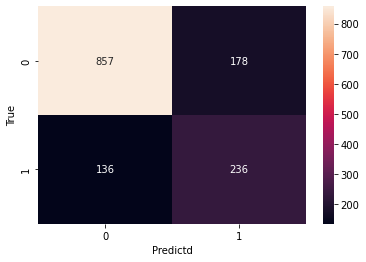

In [64]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predictd')
plt.ylabel('True')

### dealing with unbalanced data



1- undersampling method

In [65]:
unbal_0,unbal_1=y.value_counts()


In [66]:
churn_1=df2[df2['Churn']==1]  #choosing those observations which have churn===1
churn_0=df2[df2['Churn']==0]  ##choosing those observations which have churn==0

In [67]:
churn_0=churn_0.sample(unbal_1)
churn_0.shape

(1869, 27)

In [68]:
bal=pd.concat([churn_0,churn_1])
bal.shape

(3738, 27)

In [69]:
x_bal=bal.drop('Churn',axis=1)
y_bal=bal['Churn']

In [70]:
x_train_bal,x_test_bal,y_train_bal,y_test_bal=train_test_split(x_bal,y_bal,test_size=0.2,random_state=272)
print(x_train_bal.shape)
print(y_train_bal.shape)
print(x_test_bal.shape)
print(x_test_bal.shape)

(2990, 26)
(2990,)
(748, 26)
(748, 26)


1- Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy=[]
est=np.arange(100,1000,10)
for i in est:
  clf_rf = RandomForestClassifier(n_estimators=i ,random_state=1)      
  clr_rf = clf_rf.fit(x_train_bal,y_train_bal)

  ac = accuracy_score(y_test_bal,clf_rf.predict(x_test_bal))
  accuracy.append(ac*100)
print('Accuracy is: ',accuracy)

Accuracy is:  [74.73262032085562, 74.73262032085562, 75.0, 75.0, 75.0, 75.0, 75.1336898395722, 74.59893048128342, 74.73262032085562, 74.73262032085562, 74.33155080213903, 74.59893048128342, 74.8663101604278, 74.73262032085562, 74.73262032085562, 74.46524064171123, 74.46524064171123, 74.73262032085562, 74.46524064171123, 74.59893048128342, 74.8663101604278, 75.1336898395722, 75.1336898395722, 75.26737967914438, 75.26737967914438, 74.8663101604278, 74.59893048128342, 74.59893048128342, 74.46524064171123, 74.33155080213903, 74.46524064171123, 74.46524064171123, 74.46524064171123, 74.46524064171123, 74.46524064171123, 74.46524064171123, 74.33155080213903, 74.46524064171123, 74.33155080213903, 74.19786096256684, 74.19786096256684, 74.19786096256684, 74.19786096256684, 74.19786096256684, 74.19786096256684, 74.33155080213903, 74.46524064171123, 74.46524064171123, 74.46524064171123, 74.46524064171123, 74.46524064171123, 74.46524064171123, 74.33155080213903, 74.46524064171123, 74.46524064171123

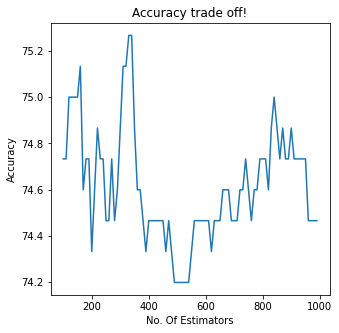

In [72]:
plt.figure(figsize=(5,5))
plt.plot(est,accuracy)
plt.xlabel('No. Of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy trade off!')
plt.show()

In [73]:
from  sklearn.model_selection import RandomizedSearchCV
rf_c=RandomForestClassifier()
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)
random_cv.fit(x_train_bal,y_train_bal)
best_random=random_cv.best_estimator_
prediction_cv=best_random.predict(x_test_bal)
print('best estimators are : ',best_random)
print(accuracy_score(y_test_bal,prediction_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.8s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.8s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.8s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   3.2s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   3.2s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   3.4s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

So aacuracy has increased slightly 

In [74]:
model1=keras.Sequential([
                        keras.layers.Dense(20,input_shape=(26,),activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid'),
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.fit(x_train_bal,y_train_bal,epochs=5,batch_size=8)


Epoch 1/5
374/374 [==============================] - 1s 2ms/step - loss: 0.5919 - accuracy: 0.6866
Epoch 2/5
374/374 [==============================] - 1s 2ms/step - loss: 0.5087 - accuracy: 0.7545
Epoch 3/5
374/374 [==============================] - 1s 2ms/step - loss: 0.4972 - accuracy: 0.7572
Epoch 4/5
374/374 [==============================] - 1s 1ms/step - loss: 0.4934 - accuracy: 0.7605
Epoch 5/5
374/374 [==============================] - 1s 1ms/step - loss: 0.4909 - accuracy: 0.7619


In [75]:
model2=keras.Sequential([
                        keras.layers.Dense(20,input_shape=(26,),activation='relu'),
                        keras.layers.Dense(10,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid'),
])


model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.fit(x_train_bal,y_train_bal,epochs=5,batch_size=8)

Epoch 1/5
374/374 [==============================] - 1s 2ms/step - loss: 0.5837 - accuracy: 0.7064
Epoch 2/5
374/374 [==============================] - 1s 2ms/step - loss: 0.5084 - accuracy: 0.7569
Epoch 3/5
374/374 [==============================] - 1s 2ms/step - loss: 0.4975 - accuracy: 0.7575
Epoch 4/5
374/374 [==============================] - 1s 2ms/step - loss: 0.4910 - accuracy: 0.7602
Epoch 5/5
374/374 [==============================] - 1s 2ms/step - loss: 0.4885 - accuracy: 0.7609


In [76]:
model2.evaluate(x_test_bal,y_test_bal)
y_pred_bal=model2.predict(x_test_bal)


24/24 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.7767


In [77]:
y_predict_bal=[]
for i in y_pred_bal:
  if i>0.5:
    y_predict_bal.append(1)
  else:
    y_predict_bal.append(0)

In [78]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test_bal,y_predict_bal))
print(classification_report(y_test_bal,y_predict_bal))
cm=confusion_matrix(y_test_bal,y_predict_bal)
print(cm)

0.7767379679144385
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       395
           1       0.73      0.85      0.78       353

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.79      0.78      0.78       748

[[282 113]
 [ 54 299]]


Text(33.0, 0.5, 'True')

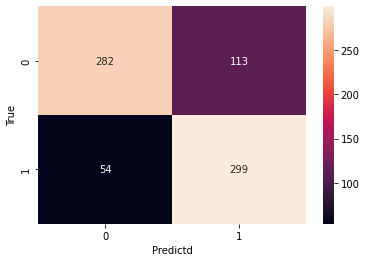

In [79]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predictd')
plt.ylabel('True')

In [80]:
model3=tf.keras.Sequential([
                            keras.layers.Dense(20,input_shape=(26,),activation='relu'),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(100,activation='relu'),
                            keras.layers.Dropout(0.3),
                            keras.layers.Dense(1,activation='sigmoid')
])
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model3.fit(x_train,y_train,epochs=100,batch_size=10)    # accuracy we got increased

  

Epoch 1/100
563/563 [==============================] - 2s 2ms/step - loss: 0.4690 - accuracy: 0.7680
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4365 - accuracy: 0.7929
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4322 - accuracy: 0.7927
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4268 - accuracy: 0.7975
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4251 - accuracy: 0.7963
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4233 - accuracy: 0.8034
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4238 - accuracy: 0.7956
Epoch 8/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4194 - accuracy: 0.8043
Epoch 9/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4170 - accuracy: 0.8069
Epoch 10/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4193 - accura

In [81]:
y_pred_bal=model3.predict(x_test_bal)
y_pred_bal

array([[4.82661843e-01],
       [5.34572482e-01],
       [1.54718757e-02],
       [8.95361602e-02],
       [2.76065171e-02],
       [1.89726651e-02],
       [6.52260184e-01],
       [6.21660233e-01],
       [2.19021440e-02],
       [6.04803562e-01],
       [3.77262503e-01],
       [5.45854270e-02],
       [4.51832026e-01],
       [2.50886083e-02],
       [1.46377683e-02],
       [9.48861241e-01],
       [3.95452976e-03],
       [7.39475846e-01],
       [5.69377542e-02],
       [3.76008153e-01],
       [4.07717615e-01],
       [5.65228224e-01],
       [1.78204775e-02],
       [3.13117474e-01],
       [4.64944869e-01],
       [4.83357459e-01],
       [9.99110937e-03],
       [1.29383266e-01],
       [6.86568677e-01],
       [6.97925985e-02],
       [8.07358742e-01],
       [4.52809453e-01],
       [8.53001118e-01],
       [5.33016443e-01],
       [3.88863683e-03],
       [2.09778100e-01],
       [6.15147531e-01],
       [4.44671184e-01],
       [2.75603712e-01],
       [4.61088359e-01],


In [82]:
y_predict_bal=[]
for i in y_pred_bal:
  if i>0.5:
    y_predict_bal.append(1)
  else:
    y_predict_bal.append(0)

In [83]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test_bal,y_predict_bal))
print(classification_report(y_test_bal,y_predict_bal))
cm=confusion_matrix(y_test_bal,y_predict_bal)
print(cm)    # we can see f1- score decreased so i would say dropout is not a very good approach in this . So i will not conclude this model.

0.7820855614973262
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       395
           1       0.84      0.67      0.74       353

    accuracy                           0.78       748
   macro avg       0.79      0.78      0.78       748
weighted avg       0.79      0.78      0.78       748

[[350  45]
 [118 235]]


Text(33.0, 0.5, 'True')

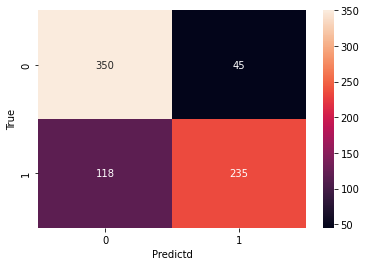

In [84]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predictd')
plt.ylabel('True')

2- Oversmapling method----

In [85]:
unbal_0,unbal_1=y.value_counts()


In [86]:
churn_0=df2[df2['Churn']==0]
churn_1=df2[df2['Churn']==1]

In [87]:
churn_1=churn_1.sample(unbal_0,replace=True)
churn_1.shape

(5163, 27)

In [88]:
bal=pd.concat([churn_0,churn_1])
bal.shape

(10326, 27)

In [89]:
x_bal=bal.drop('Churn',axis=1)
y_bal=bal['Churn']

In [90]:
x_train_bal,x_test_bal,y_train_bal,y_test_bal=train_test_split(x_bal,y_bal,test_size=0.2,random_state=272)
print(x_train_bal.shape)
print(y_train_bal.shape)
print(x_test_bal.shape)
print(y_test_bal.shape)

(8260, 26)
(8260,)
(2066, 26)
(2066,)


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy=[]
est=np.arange(100,1000,10)
for i in est:
  clf_rf = RandomForestClassifier(n_estimators=i ,random_state=1)      
  clr_rf = clf_rf.fit(x_train_bal,y_train_bal)

  ac = accuracy_score(y_test_bal,clf_rf.predict(x_test_bal))
  accuracy.append(ac*100)
print('Accuracy is: ',accuracy)         

Accuracy is:  [89.64181994191675, 89.59341723136495, 89.59341723136495, 89.54501452081317, 89.78702807357212, 89.83543078412391, 89.93223620522748, 89.83543078412391, 89.64181994191675, 89.69022265246855, 89.73862536302033, 89.69022265246855, 89.64181994191675, 89.69022265246855, 89.78702807357212, 89.78702807357212, 89.64181994191675, 89.64181994191675, 89.64181994191675, 89.64181994191675, 89.69022265246855, 89.64181994191675, 89.73862536302033, 89.73862536302033, 89.69022265246855, 89.64181994191675, 89.59341723136495, 89.64181994191675, 89.64181994191675, 89.64181994191675, 89.59341723136495, 89.59341723136495, 89.64181994191675, 89.64181994191675, 89.64181994191675, 89.69022265246855, 89.59341723136495, 89.64181994191675, 89.59341723136495, 89.54501452081317, 89.49661181026137, 89.49661181026137, 89.59341723136495, 89.59341723136495, 89.59341723136495, 89.59341723136495, 89.59341723136495, 89.59341723136495, 89.64181994191675, 89.69022265246855, 89.59341723136495, 89.5450145208131

In [92]:
from  sklearn.model_selection import RandomizedSearchCV
rf_c=RandomForestClassifier()
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)
random_cv.fit(x_train,y_train)
best_random=random_cv.best_estimator_
prediction_cv=best_random.predict(x_test)
print('best estimators are : ',best_random)
print(accuracy_score(y_test,prediction_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   4.2s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   4.1s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   4.3s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   4.8s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   5.1s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   3.4s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

In [93]:
model2=keras.Sequential([
                        keras.layers.Dense(20,input_shape=(26,),activation='relu'),
                        keras.layers.Dense(10,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid'),
])

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.fit(x_train_bal,y_train_bal,epochs=5,batch_size=8)        #overfitted model

Epoch 1/5
1033/1033 [==============================] - 2s 2ms/step - loss: 0.5079 - accuracy: 0.7484
Epoch 2/5
1033/1033 [==============================] - 2s 2ms/step - loss: 0.4803 - accuracy: 0.7674
Epoch 3/5
1033/1033 [==============================] - 2s 2ms/step - loss: 0.4759 - accuracy: 0.7674
Epoch 4/5
1033/1033 [==============================] - 2s 2ms/step - loss: 0.4712 - accuracy: 0.7709
Epoch 5/5
1033/1033 [==============================] - 2s 2ms/step - loss: 0.4675 - accuracy: 0.7720


In [94]:
model3=tf.keras.Sequential([
                            keras.layers.Dense(20,input_shape=(26,),activation='relu'),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(100,activation='relu'),
                            keras.layers.Dropout(0.3),
                            keras.layers.Dense(1,activation='sigmoid')
])
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model3.fit(x_train,y_train,epochs=50,batch_size=10)

Epoch 1/50
563/563 [==============================] - 2s 2ms/step - loss: 0.4938 - accuracy: 0.7572
Epoch 2/50
563/563 [==============================] - 1s 2ms/step - loss: 0.4402 - accuracy: 0.7845
Epoch 3/50
563/563 [==============================] - 1s 2ms/step - loss: 0.4317 - accuracy: 0.7957
Epoch 4/50
563/563 [==============================] - 1s 2ms/step - loss: 0.4309 - accuracy: 0.7908
Epoch 5/50
563/563 [==============================] - 1s 2ms/step - loss: 0.4253 - accuracy: 0.8018
Epoch 6/50
563/563 [==============================] - 1s 2ms/step - loss: 0.4238 - accuracy: 0.7988
Epoch 7/50
563/563 [==============================] - 1s 2ms/step - loss: 0.4223 - accuracy: 0.8004
Epoch 8/50
563/563 [==============================] - 1s 2ms/step - loss: 0.4203 - accuracy: 0.8057
Epoch 9/50
563/563 [==============================] - 1s 2ms/step - loss: 0.4176 - accuracy: 0.8007
Epoch 10/50
563/563 [==============================] - 1s 2ms/step - loss: 0.4184 - accuracy: 0.8021

In [95]:
#evaluate the model
model3.evaluate(x_test_bal,y_test_bal)

65/65 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7309


[0.5208789706230164, 0.7308809161186218]

In [96]:
y_pred_bal=model3.predict(x_test_bal)
y_pred_bal

array([[0.00390646],
       [0.44527462],
       [0.01103863],
       ...,
       [0.18643332],
       [0.25320756],
       [0.6777404 ]], dtype=float32)

In [97]:
y_predict_bal=[]
for i in y_pred_bal:
  if i>0.5:
    y_predict_bal.append(1)
  else:
    y_predict_bal.append(0)

In [98]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test_bal,y_predict_bal))
print(classification_report(y_test_bal,y_predict_bal))
cm=confusion_matrix(y_test_bal,y_predict_bal)
print(cm)

0.7308809293320426
              precision    recall  f1-score   support

           0       0.68      0.90      0.77      1051
           1       0.84      0.56      0.67      1015

    accuracy                           0.73      2066
   macro avg       0.76      0.73      0.72      2066
weighted avg       0.76      0.73      0.72      2066

[[942 109]
 [447 568]]


Text(33.0, 0.5, 'True')

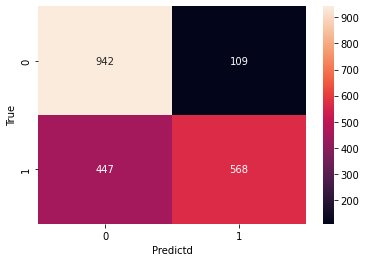

In [99]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predictd')
plt.ylabel('True')

AS I have done all the algorithms using ml approach as well as deep learing approach. So I have done it in two parts first without deal with unbalanced data set problem and in second part to deal with balanced data set .
So first we got the f1- score initialy without doing balancing the classes was 54 % f1-score approx but after doing balancing of classes we got 78 % approx f1-score (undersampling method) and got 68% f1- score in oversampling method.

So by dealing with unbalancing the perfect model is ANN with single hidden layer with undersampling method.